## Preparing the tools

 We are going to use pandas,matplotlib, and NumPy for data analysis  and manipulation

In [1]:
# import all the tools We need

# Regular EDA and plotting libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


## Load Data

In [2]:
df1= pd.read_csv("../data/Loan_Default.csv")


## Data Preprocessed

In [3]:
# rows and columns of Dataset
df1.shape 

(148670, 34)

In [4]:
df1.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df1.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


#### Idenify Duplicates of Dataset

In [6]:
df1.duplicated().sum()

np.int64(0)

#### Fill Missing Values of Categorical Columns

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [8]:
# Check Any Missing Values in DataSet
df1.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [9]:
df1['loan_limit'].value_counts()

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

In [10]:
df1["loan_limit"] = df1["loan_limit"].fillna("Unknown")


In [11]:
df1['loan_limit'].value_counts()

loan_limit
cf         135348
ncf          9978
Unknown      3344
Name: count, dtype: int64

In [12]:
df1.isna().sum()

ID                               0
year                             0
loan_limit                       0
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [13]:
# 1. Drop rows where age is NaN
df1 = df1.dropna(subset=["age"])


# 2. For all other categorical columns, fill NaN with "Unknown"
for col in df1.select_dtypes(include=["object"]).columns:
    if col != "age":   # skip age
        df1[col] = df1[col].fillna("Unknown")


In [14]:
# Loop through all categorical (object) columns and show category counts
for col in df1.select_dtypes(include=["object"]).columns:
    print(f"\nColumn: {col}")
    print(df1[col].value_counts(dropna=False))


Column: loan_limit
loan_limit
cf         135330
ncf          9808
Unknown      3332
Name: count, dtype: int64

Column: Gender
Gender
Male                 42346
Joint                41399
Sex Not Available    37459
Female               27266
Name: count, dtype: int64

Column: approv_in_adv
approv_in_adv
nopre      124422
pre         23140
Unknown       908
Name: count, dtype: int64

Column: loan_type
loan_type
type1    113137
type2     20603
type3     14730
Name: count, dtype: int64

Column: loan_purpose
loan_purpose
p3         55871
p4         54766
p1         34437
p2          3270
Unknown      126
Name: count, dtype: int64

Column: Credit_Worthiness
Credit_Worthiness
l1    142144
l2      6326
Name: count, dtype: int64

Column: open_credit
open_credit
nopc    147914
opc        556
Name: count, dtype: int64

Column: business_or_commercial
business_or_commercial
nob/c    127867
b/c       20603
Name: count, dtype: int64

Column: Neg_ammortization
Neg_ammortization
not_neg    133349
neg_

#### Fill Missing Values of Numerical Columns

In [15]:
# Loop through all Numerical (object) columns and show category counts
for col in df1.select_dtypes(include=["int64", "float64"]).columns:
    print(f"\nColumn: {col}")
    print(df1[col].value_counts(dropna=False))


Column: ID
ID
24890     1
124054    1
124002    1
124003    1
124004    1
         ..
74451     1
74452     1
74453     1
74454     1
173559    1
Name: count, Length: 148470, dtype: int64

Column: year
year
2019    148470
Name: count, dtype: int64

Column: loan_amount
loan_amount
206500     4604
256500     4072
156500     3960
226500     3938
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64

Column: rate_of_interest
rate_of_interest
NaN      36439
3.990    14433
3.625     8798
3.875     8577
3.750     8447
         ...  
5.300        1
7.750        1
7.375        1
4.700        1
2.700        1
Name: count, Length: 131, dtype: int64

Column: Interest_rate_spread
Interest_rate_spread
 NaN       36439
-0.0280       77
-0.0380       64
-0.0230       60
-0.1730       56
           ...  
 1.6577        1
 0.9592        1
-0.4142        1
-0.5893        1
-0.3247        1
Name: count, Lengt

In [16]:
for col in df1.select_dtypes(include=["int64", "float64"]).columns:
    df1[col] = df1[col].fillna(df1[col].median())

In [17]:
# Loop through all Numerical (object) columns and show category counts
for col in df1.select_dtypes(include=["int64", "float64"]).columns:
    print(f"\nColumn: {col}")
    print(df1[col].value_counts(dropna=False))


Column: ID
ID
24890     1
124054    1
124002    1
124003    1
124004    1
         ..
74451     1
74452     1
74453     1
74454     1
173559    1
Name: count, Length: 148470, dtype: int64

Column: year
year
2019    148470
Name: count, dtype: int64

Column: loan_amount
loan_amount
206500     4604
256500     4072
156500     3960
226500     3938
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64

Column: rate_of_interest
rate_of_interest
3.990    50872
3.625     8798
3.875     8577
3.750     8447
3.500     6864
         ...  
5.300        1
2.125        1
4.700        1
8.000        1
2.700        1
Name: count, Length: 130, dtype: int64

Column: Interest_rate_spread
Interest_rate_spread
 0.3904    36450
-0.0280       77
-0.0380       64
-0.0230       60
-0.1730       56
           ...  
 1.5268        1
-0.1791        1
 1.3850        1
 1.4201        1
-0.3247        1
Name: count, Lengt

In [18]:
## After Filling Null Values of Categorical and Numerical Columns
df1.isna().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [19]:
df1['age']

0         25-34
1         55-64
2         35-44
3         45-54
4         25-34
          ...  
148665    55-64
148666    25-34
148667    45-54
148668    55-64
148669    45-54
Name: age, Length: 148470, dtype: object

In [20]:
df1.shape

(148470, 34)

In [34]:
df1['Status'].value_counts()


Status
0    112031
1     36439
Name: count, dtype: int64

# 🧠 Dataset Exploration & Understanding

In [21]:
import os


In [43]:
save_dir = "/Users/jayashanguruge/Desktop/IT24101186/results/eda_visualizations/outliers_before"
os.makedirs(save_dir, exist_ok=True)  # Create folder if it doesn't exist

# Select numeric columns
numeric_cols = df1.select_dtypes(include=["int64", "float64"]).columns

# Loop through each column and save boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col} (Before Outlier Handling)')
    
    # Save figure
    file_path = os.path.join(save_dir, f"{col}_boxplot_before.png")
    plt.savefig(file_path)
    plt.close()  # Close figure to avoid overlapping plots

print(f"Boxplots of original data saved in: {save_dir}")

Boxplots of original data saved in: /Users/jayashanguruge/Desktop/IT24101186/results/eda_visualizations/outliers_before


{'ID': 0, 'year': 0, 'loan_amount': 1894, 'rate_of_interest': 6801, 'Interest_rate_spread': 11373, 'Upfront_charges': 8889, 'term': 26823, 'property_value': 6595, 'income': 7636, 'Credit_Score': 0, 'LTV': 4665, 'Status': 36439, 'dtir1': 5508}


/var/folders/_1/zk1pcn714jq383pplbq0xq580000gn/T/ipykernel_11432/1922205118.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns, y=outlier_counts, palette="viridis")


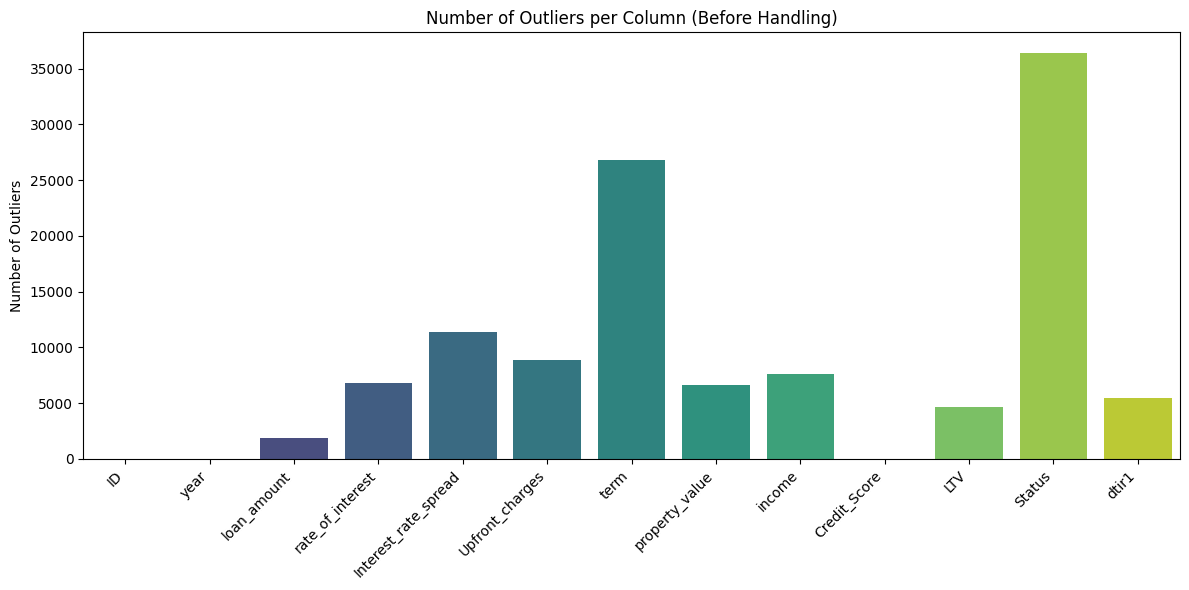

Bar chart of outliers saved in: /Users/jayashanguruge/Desktop/IT24101186/results/eda_visualizations/outliers_before/outliers_count_before.png


In [24]:
def detect_outliers_iqr(data):
    outlier_summary = {}
    numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
    
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        outlier_summary[col] = len(outliers)
    
    return outlier_summary

# Run on your dataset
outliers_dict = detect_outliers_iqr(df1)
print(outliers_dict)

# Directory to save the plot
save_dir = "/Users/jayashanguruge/Desktop/IT24101186/results/eda_visualizations/outliers_before"
os.makedirs(save_dir, exist_ok=True)


outliers_dict = detect_outliers_iqr(df1)  # or df1

# Prepare data for plotting
columns = list(outliers_dict.keys())
outlier_counts = list(outliers_dict.values())

#  Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=columns, y=outlier_counts, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Outliers")
plt.title("Number of Outliers per Column (Before Handling)")
plt.tight_layout()

# Save figure
file_path = os.path.join(save_dir, "outliers_count_before.png")
plt.savefig(file_path)
plt.show()

print(f"Bar chart of outliers saved in: {file_path}")

#### Handle Outliers

In [36]:
df2_outlier=df1.copy()
def winsorize_iqr(data, exclude_cols=None):
    df_winsor = df2_outlier.copy()
    if exclude_cols is None:
        exclude_cols = []
    
    # Select only numeric columns
    numeric_cols = df_winsor.select_dtypes(include=["int64", "float64"]).columns
    
    # Exclude categorical/binary columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    for col in numeric_cols:
        Q1 = df_winsor[col].quantile(0.25)
        Q3 = df_winsor[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Winsorize
        df_winsor[col] = df_winsor[col].apply(
            lambda x: lower if x < lower else upper if x > upper else x
        )
    
    return df_winsor
    
df_winsorized = winsorize_iqr(df2_outlier, exclude_cols=["Status"])
print(df_winsorized.describe())


                  ID      year    loan_amount  rate_of_interest  \
count  148470.000000  148470.0  148470.000000     148470.000000   
mean    99225.132566    2019.0  327887.620395          4.022851   
std     42918.274684       0.0  168933.023443          0.453433   
min     24890.000000    2019.0   16500.000000          3.000000   
25%     62058.250000    2019.0  196500.000000          3.750000   
50%     99220.500000    2019.0  296500.000000          3.990000   
75%    136394.750000    2019.0  436500.000000          4.250000   
max    173559.000000    2019.0  796500.000000          5.000000   

       Interest_rate_spread  Upfront_charges      term  property_value  \
count         148470.000000    148470.000000  148470.0    1.484700e+05   
mean               0.422463      2877.923296     360.0    4.673674e+05   
std                0.413540      2203.341578       0.0    2.421125e+05   
min               -0.479063         0.000000     360.0    8.000000e+03   
25%                0.18090

In [41]:
df_cleaned3 = df_winsorized     # if you winsorized outliers

# Directory to save plots
save_dir = "/Users/jayashanguruge/Desktop/IT24101186/results/eda_visualizations/outliers_after"
os.makedirs(save_dir, exist_ok=True)  # Create folder if it doesn't exist

# Select numeric columns
numeric_cols = df_cleaned3.select_dtypes(include=["int64", "float64"]).columns

# Loop through each column and save boxplot
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    
    # Save figure
    file_path = os.path.join(save_dir, f"{col}_boxplot_after.png")
    plt.savefig(file_path)
    plt.close()

print(f"Boxplots after handling outliers saved in: {save_dir}")

Boxplots after handling outliers saved in: /Users/jayashanguruge/Desktop/IT24101186/results/eda_visualizations/outliers_after


In [37]:
df_winsorized['Status'].value_counts()

Status
0    112031
1     36439
Name: count, dtype: int64

#### Encoding


In [38]:
df_encoded1=df_winsorized.copy()

In [39]:
df_encoded1.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,75.122549,North,direct,1,39.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [40]:
for col in df_encoded1.columns:
    print(f"\nColumn: {col}")
    print(df_encoded1[col].unique())



Column: ID
[ 24890  24891  24892 ... 173557 173558 173559]

Column: year
[2019]

Column: loan_limit
['cf' 'Unknown' 'ncf']

Column: Gender
['Sex Not Available' 'Male' 'Joint' 'Female']

Column: approv_in_adv
['nopre' 'pre' 'Unknown']

Column: loan_type
['type1' 'type2' 'type3']

Column: loan_purpose
['p1' 'p4' 'p3' 'p2' 'Unknown']

Column: Credit_Worthiness
['l1' 'l2']

Column: open_credit
['nopc' 'opc']

Column: business_or_commercial
['nob/c' 'b/c']

Column: loan_amount
[116500. 206500. 406500. 456500. 696500. 706500. 346500. 266500. 376500.
 436500. 136500. 466500. 226500.  76500. 356500. 156500. 586500. 306500.
 316500. 336500. 426500. 476500. 196500. 186500. 246500. 216500. 506500.
 656500. 256500. 396500. 166500. 236500. 796500. 416500. 386500. 596500.
 606500.  86500. 286500. 146500. 446500. 636500. 486500. 326500.  56500.
 496500. 106500. 126500. 296500. 176500. 566500. 686500. 556500. 676500.
 366500. 276500. 716500.  66500. 616500.  96500.  26500. 666500. 546500.
 526500. 72

In [42]:
label_encoders = {}   # store encoders for later use
category_mappings = {}  # store category → code mapping

for col in df_encoded1.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_encoded1[col] = le.fit_transform(df_encoded1[col].astype(str))
    
    # Save the encoder + mapping
    label_encoders[col] = le
    category_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Show mappings
for col, mapping in category_mappings.items():
    print(f"{col}: {mapping}")

loan_limit: {'Unknown': np.int64(0), 'cf': np.int64(1), 'ncf': np.int64(2)}
Gender: {'Female': np.int64(0), 'Joint': np.int64(1), 'Male': np.int64(2), 'Sex Not Available': np.int64(3)}
approv_in_adv: {'Unknown': np.int64(0), 'nopre': np.int64(1), 'pre': np.int64(2)}
loan_type: {'type1': np.int64(0), 'type2': np.int64(1), 'type3': np.int64(2)}
loan_purpose: {'Unknown': np.int64(0), 'p1': np.int64(1), 'p2': np.int64(2), 'p3': np.int64(3), 'p4': np.int64(4)}
Credit_Worthiness: {'l1': np.int64(0), 'l2': np.int64(1)}
open_credit: {'nopc': np.int64(0), 'opc': np.int64(1)}
business_or_commercial: {'b/c': np.int64(0), 'nob/c': np.int64(1)}
Neg_ammortization: {'Unknown': np.int64(0), 'neg_amm': np.int64(1), 'not_neg': np.int64(2)}
interest_only: {'int_only': np.int64(0), 'not_int': np.int64(1)}
lump_sum_payment: {'lpsm': np.int64(0), 'not_lpsm': np.int64(1)}
construction_type: {'mh': np.int64(0), 'sb': np.int64(1)}
occupancy_type: {'ir': np.int64(0), 'pr': np.int64(1), 'sr': np.int64(2)}
Secure